In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress
import scipy.stats as stats
import gmaps
from api_key import g_key

In [4]:
#File paths of the CSV files
vaccine_csv = ("Booster_Region.csv")
daily_deaths_csv = ('Deaths_Region.csv')
hosp_admissions = ('Hops_Admits_Region.csv')
cases_csv = ("Cases_Region.csv")

#Import the CSVs to be used
daily_deaths_df = pd.read_csv(daily_deaths_csv)
hosp_admissions_df = pd.read_csv(hosp_admissions)
booster_df = pd.read_csv(vaccine_csv)
cases_df = pd.read_csv(cases_csv)

In [5]:
#Show contents of the dataframes
daily_deaths_df.head()

,areaType,areaName,areaCode,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,region,East of England,E12000006,11/07/2022,6,18320,NaN,NaN,NaN
1,region,East of England,E12000006,10/07/2022,5,18314,NaN,NaN,NaN
2,region,East of England,E12000006,09/07/2022,8,18309,NaN,NaN,NaN
3,region,East of England,E12000006,08/07/2022,10,18301,NaN,NaN,NaN
4,region,East of England,E12000006,07/07/2022,11,18291,NaN,NaN,NaN


In [6]:
hosp_admissions_df.head()

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,nhsRegion,Midlands,E40000008,11/07/2022,428,155627
1,nhsRegion,Midlands,E40000008,10/07/2022,375,155199
2,nhsRegion,Midlands,E40000008,09/07/2022,314,154824
3,nhsRegion,Midlands,E40000008,08/07/2022,365,154510
4,nhsRegion,Midlands,E40000008,07/07/2022,421,154145


In [7]:
booster_df.head()

,areaType,areaName,areaCode,date,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate
0,region,Midlands,E12000004,12/07/2022,118,8249096,602,7860426,901.0,6195713.0
1,region,Midlands,E12000004,11/07/2022,181,8248978,713,7859824,1079.0,6194812.0
2,region,Midlands,E12000004,10/07/2022,112,8248797,690,7859111,586.0,6193733.0
3,region,Midlands,E12000004,09/07/2022,335,8248685,1909,7858421,1334.0,6193147.0
4,region,Midlands,E12000004,08/07/2022,178,8248350,784,7856512,1065.0,6191813.0


In [8]:
cases_df.head()

,areaType,areaName,areaCode,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0


In [9]:
#Begin merging the dataframes
cases_deaths_df = pd.merge(cases_df, daily_deaths_df, on=["date", "areaName"], how="outer")

cases_deaths_df.head()

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,areaType_y,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,region,E12000009,3.0,11227.0,NaN,NaN,NaN
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,region,E12000009,9.0,11224.0,NaN,NaN,NaN
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,region,E12000009,14.0,11215.0,NaN,NaN,NaN
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,region,E12000009,5.0,11201.0,NaN,NaN,NaN


In [10]:
add_hosp_df = pd.merge(cases_deaths_df, hosp_admissions_df, on=["date", "areaName"], how="outer")
add_hosp_df.head()

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,areaCode_y,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate,Unnamed: 6,Unnamed: 7,Unnamed: 8,areaType,areaCode,newAdmissions,cumAdmissions
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,...,E12000009,3.0,11227.0,NaN,NaN,NaN,nhsRegion,E40000006,208.0,65498.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,...,E12000009,9.0,11224.0,NaN,NaN,NaN,nhsRegion,E40000006,190.0,65290.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,...,E12000009,14.0,11215.0,NaN,NaN,NaN,nhsRegion,E40000006,154.0,65100.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,...,E12000009,5.0,11201.0,NaN,NaN,NaN,nhsRegion,E40000006,146.0,64946.0


In [11]:
full_covid = pd.merge(add_hosp_df, booster_df, on=["date", "areaName"], how="outer")
full_covid.head()

,areaType_x,areaName,areaCode_x,date,newCasesBySpecimenDate,cumCasesBySpecimenDate,newFirstEpisodesBySpecimenDate,cumFirstEpisodesBySpecimenDate,newReinfectionsBySpecimenDate,cumReinfectionsBySpecimenDate,...,newAdmissions,cumAdmissions,areaType_y,areaCode_y,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate
0,region,South West,E12000009,12/07/2022,1879,1836485,1523,1739034,356.0,97451.0,...,NaN,NaN,region,E12000009,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0
1,region,South West,E12000009,11/07/2022,2756,1834606,2204,1737511,552.0,97095.0,...,208.0,65498.0,region,E12000009,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0
2,region,South West,E12000009,10/07/2022,2566,1831850,2069,1735307,497.0,96543.0,...,190.0,65290.0,region,E12000009,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0
3,region,South West,E12000009,09/07/2022,2199,1829284,1782,1733238,417.0,96046.0,...,154.0,65100.0,region,E12000009,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0
4,region,South West,E12000009,08/07/2022,2615,1827085,2149,1731456,466.0,95629.0,...,146.0,64946.0,region,E12000009,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0


In [12]:
#Display the total columns of the dataframe
full_covid.columns

Index(['areaType_x', 'areaName', 'areaCode_x', 'date',
       'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newFirstEpisodesBySpecimenDate', 'cumFirstEpisodesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'areaType_y', 'areaCode_y', 'newDeaths28DaysByDeathDate',
       'cumDeaths28DaysByDeathDate', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'areaType_x', 'areaCode_x', 'newAdmissions', 'cumAdmissions',
       'areaType_y', 'areaCode_y',
       'newPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'newPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'newPeopleVaccinatedThirdInjectionByVaccinationDate',
       'cumPeopleVaccinatedThirdInjectionByVaccinationDate'],
      dtype='object')

In [13]:
#Drop unwanted columns
full_covid = full_covid[['areaName','date', 'newCasesBySpecimenDate', 'cumCasesBySpecimenDate', 
                         'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate', 
                         'newDeaths28DaysByDeathDate', 'cumDeaths28DaysByDeathDate',
                         'newAdmissions', 'cumAdmissions',
                         'newPeopleVaccinatedFirstDoseByVaccinationDate',
                         'cumPeopleVaccinatedFirstDoseByVaccinationDate',
                         'newPeopleVaccinatedSecondDoseByVaccinationDate',
                         'cumPeopleVaccinatedSecondDoseByVaccinationDate',
                         'newPeopleVaccinatedThirdInjectionByVaccinationDate',
                         'cumPeopleVaccinatedThirdInjectionByVaccinationDate'
                        ]]
full_covid.columns

Index(['areaName', 'date', 'newCasesBySpecimenDate', 'cumCasesBySpecimenDate',
       'newReinfectionsBySpecimenDate', 'cumReinfectionsBySpecimenDate',
       'newDeaths28DaysByDeathDate', 'cumDeaths28DaysByDeathDate',
       'newAdmissions', 'cumAdmissions',
       'newPeopleVaccinatedFirstDoseByVaccinationDate',
       'cumPeopleVaccinatedFirstDoseByVaccinationDate',
       'newPeopleVaccinatedSecondDoseByVaccinationDate',
       'cumPeopleVaccinatedSecondDoseByVaccinationDate',
       'newPeopleVaccinatedThirdInjectionByVaccinationDate',
       'cumPeopleVaccinatedThirdInjectionByVaccinationDate'],
      dtype='object')

In [14]:
#Rename columns
full_covid_renamed = full_covid.rename(columns={"date": "Date", "areaName": "Region",
                           "newCasesBySpecimenDate" : "New Cases",
                           "cumCasesBySpecimenDate" : "New Cases (cumulative)",
                           "newReinfectionsBySpecimenDate" : "Reinfections",
                           "cumReinfectionsBySpecimenDate" : "Reinfections (cumulative)",                    
                           "newPeopleVaccinatedFirstDoseByVaccinationDate": "New Vaccinations, 1st dose",
                           "cumPeopleVaccinatedFirstDoseByVaccinationDate": "New Vaccinations, 1st dose (cumulative)",
                           "newPeopleVaccinatedSecondDoseByVaccinationDate": "New Vaccinations, 2nd dose",
                           "cumPeopleVaccinatedSecondDoseByVaccinationDate": "New Vaccinations, 2nd dose (cumulative)",
                            "newPeopleVaccinatedThirdInjectionByVaccinationDate": "New Vaccinations, Booster",
                            "cumPeopleVaccinatedThirdInjectionByVaccinationDate": "New Vaccinations, Booster (cumulative)",
                           "newDeaths28DaysByDeathDate": "New Daily Deaths",
                           "cumDeaths28DaysByDeathDate": "New Daily Deaths (cumulative)",
                           "newAdmissions":"New Hospital Admissions",
                           "cumAdmissions": "New Hospital Admissions (cumulative)"})
full_covid_renamed.head()

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)"
0,South West,12/07/2022,1879,1836485,356.0,97451.0,NaN,NaN,NaN,NaN,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0
1,South West,11/07/2022,2756,1834606,552.0,97095.0,3.0,11227.0,208.0,65498.0,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0
2,South West,10/07/2022,2566,1831850,497.0,96543.0,9.0,11224.0,190.0,65290.0,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0
3,South West,09/07/2022,2199,1829284,417.0,96046.0,14.0,11215.0,154.0,65100.0,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0
4,South West,08/07/2022,2615,1827085,466.0,95629.0,5.0,11201.0,146.0,64946.0,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0


In [15]:
full_covid_renamed.to_csv("full_covid_renamed.csv", index=False)

In [16]:
#Convert the date to a timestamp for calculation purposes
full_covid_date = pd.to_datetime(full_covid_renamed["Date"]).map(pd.Timestamp.timestamp)
full_covid_date
#Add the timestamp column to the dataframe
full_covid_renamed["Timestamp"] = full_covid_date
full_covid_renamed

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp
0,South West,12/07/2022,1879,1836485,356.0,97451.0,NaN,NaN,NaN,NaN,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0,1.670371e+09
1,South West,11/07/2022,2756,1834606,552.0,97095.0,3.0,11227.0,208.0,65498.0,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0,1.667779e+09
2,South West,10/07/2022,2566,1831850,497.0,96543.0,9.0,11224.0,190.0,65290.0,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0,1.665101e+09
3,South West,09/07/2022,2199,1829284,417.0,96046.0,14.0,11215.0,154.0,65100.0,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0,1.662509e+09
4,South West,08/07/2022,2615,1827085,466.0,95629.0,5.0,11201.0,146.0,64946.0,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0,1.659830e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,East of England,07/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.593648e+09
6197,East of England,06/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.591056e+09
6198,East of England,05/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.588378e+09
6199,East of England,04/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.585786e+09


In [17]:
#Group by region to get summaries by region
summary_stats = full_covid_renamed.groupby(["Region"]).max()
summary_df = pd.DataFrame(summary_stats)
summary_df

,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp
Region,,,,,,,,,,,,,,,,
East of England,31/12/2021,23990,2126367,1821.0,117401.0,203.0,18320.0,524.0,78276.0,80038.0,4921533.0,67395.0,4720746.0,96604.0,3820972.0,1.670371e+09
London,31/12/2021,36921,3001412,3134.0,173474.0,232.0,20410.0,977.0,128548.0,65902.0,6495206.0,56454.0,6087184.0,118816.0,4405875.0,1.670371e+09
Midlands,31/12/2021,45439,3632012,4730.0,216315.0,226.0,33127.0,862.0,155627.0,137909.0,8249096.0,102983.0,7860426.0,157334.0,6195713.0,1.670371e+09
North East and Yorkshire,31/12/2021,44060,2855588,5460.0,185068.0,128.0,25018.0,507.0,134420.0,108519.0,6308672.0,84277.0,6007153.0,116491.0,4768006.0,1.670371e+09
North West,31/12/2021,40221,2665613,5194.0,177697.0,166.0,25299.0,485.0,122631.0,85430.0,5640462.0,66551.0,5357551.0,95702.0,4155410.0,1.670371e+09
South East,31/12/2021,31863,3152816,2572.0,167089.0,285.0,23419.0,716.0,106378.0,131344.0,7362159.0,93748.0,7064374.0,155126.0,5788792.0,1.670371e+09
South West,31/12/2021,17082,1836485,1381.0,97451.0,109.0,11227.0,347.0,65498.0,84476.0,4623975.0,77398.0,4442401.0,109767.0,3708049.0,1.670371e+09


In [18]:
#Drop unwanted columns
summary_group = summary_df[["New Cases (cumulative)", "Reinfections (cumulative)", 
                               "New Daily Deaths (cumulative)","New Hospital Admissions (cumulative)", 
                               "New Vaccinations, 1st dose (cumulative)", "New Vaccinations, 2nd dose (cumulative)",
                               "New Vaccinations, Booster (cumulative)", "Timestamp"]]
summary_group

,New Cases (cumulative),Reinfections (cumulative),New Daily Deaths (cumulative),New Hospital Admissions (cumulative),"New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster (cumulative)",Timestamp
Region,,,,,,,,
East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09
London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09
Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09
North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09
North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09
South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09
South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09


In [19]:
#Convert the timestamp to a date and add it to the dataframe
actual_date = pd.to_datetime(summary_group["Timestamp"],unit='s')
summary_group["Date"]  = actual_date
summary_group[["Date", "New Cases (cumulative)", "Reinfections (cumulative)", "New Daily Deaths (cumulative)",
              "New Hospital Admissions (cumulative)", "New Vaccinations, 1st dose (cumulative)",
              "New Vaccinations, 2nd dose (cumulative)", "New Vaccinations, Booster (cumulative)"]]

C:\Users\Spectre 13 X360\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,New Cases (cumulative),Reinfections (cumulative),New Daily Deaths (cumulative),New Hospital Admissions (cumulative),"New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster (cumulative)"
Region,,,,,,,,
East of England,2022-12-07,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0
London,2022-12-07,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0
Midlands,2022-12-07,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0
North East and Yorkshire,2022-12-07,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0
North West,2022-12-07,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0
South East,2022-12-07,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0
South West,2022-12-07,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0


In [20]:
#Rename columns
summary_renamed = summary_group.rename(columns={"Date":"Date",
                                             "New Cases (cumulative)": "Total Cases",
                                             "Reinfections (cumulative)": "Total Reinfections",
                                             "New Daily Deaths (cumulative)": "Total Deaths",
                                             "New Hospital Admissions (cumulative)": "Total Hospital Admissions",
                                             "New Vaccinations, 1st dose (cumulative)": "1st Vaccine Total",
                                             "New Vaccinations, 2nd dose (cumulative)": "2nd Vaccine Total",
                                             "New Vaccinations, Booster (cumulative)": "Total Booster Vaccinations"})
summary_renamed

,Total Cases,Total Reinfections,Total Deaths,Total Hospital Admissions,1st Vaccine Total,2nd Vaccine Total,Total Booster Vaccinations,Timestamp,Date
Region,,,,,,,,,
East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09,2022-12-07
London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09,2022-12-07
Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09,2022-12-07
North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09,2022-12-07
North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09,2022-12-07
South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09,2022-12-07
South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09,2022-12-07


In [21]:
#Pie chart of total cases
#Bar graph of deaths
#Horizontal bar graph Vaccinations
#Timeline number of cases and hospital admissions
#Timeline number of cases and vaccines for the UK
#Highly populated cities have a higher rate of infection - Ttest
#Heatmap- Cases by region
#Heatmap- before lockdown and after lockdown

## Charts and Graphs

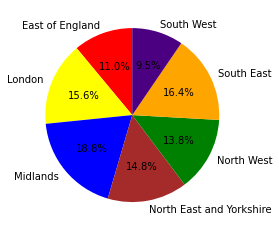

In [23]:
#Pie Chart
labels = list(summary_renamed.index.values)
sizes = summary_renamed["Total Cases"]
colors = ["red", "yellow", "blue", "brown", "green", "orange", "Indigo"]


plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct = "%1.1f%%", shadow = False)

plt.savefig("Total Cases Pie Chart.png")
plt.show()

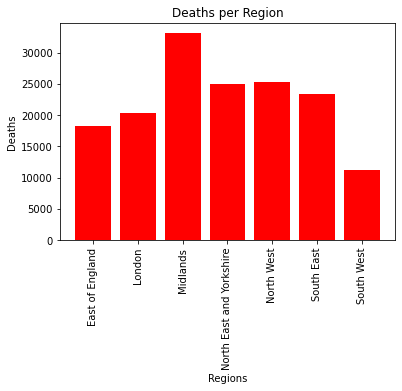

In [24]:
#Bar Graph of Deaths Per Region
x_axis = list(summary_renamed.index.values)
plt.bar(x_axis, summary_renamed["Total Deaths"], color = "red" )
plt.title("Deaths per Region")
plt.xlabel("Regions")
plt.ylabel("Deaths")
plt.xticks(rotation = "vertical")
plt.savefig("Deaths Per Region.png")
plt.show()

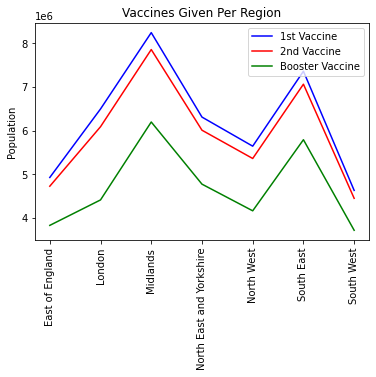

In [25]:
#Vaccines plot
vaccine1, = plt.plot(x_axis, summary_renamed["1st Vaccine Total"], color="blue", label="1st Vaccine")
vaccine2, = plt.plot(x_axis, summary_renamed["2nd Vaccine Total"], color="red", label="2nd Vaccine")
booster = plt.plot(x_axis, summary_renamed["Total Booster Vaccinations"], color="green", label="Booster Vaccine")
plt.legend(loc="best")
plt.title("Vaccines Given Per Region")
plt.ylabel("Population")
plt.xticks(rotation = "vertical")
plt.savefig("Vaccines Given Per Region.png")
plt.show()

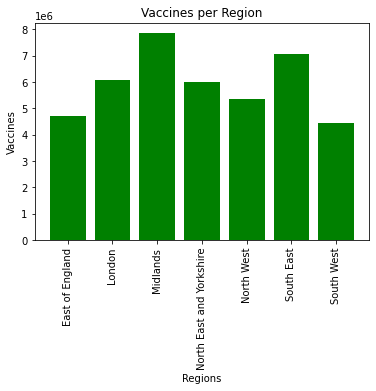

In [26]:
#Vaccine per region
x_axis = list(summary_renamed.index.values)
plt.bar(x_axis, summary_renamed["2nd Vaccine Total"], color = "green" )
plt.title("Vaccines per Region")
plt.xlabel("Regions")
plt.ylabel("Vaccines")
plt.xticks(rotation = "vertical")
plt.savefig("Vaccines per Region.png")
plt.show()

## Heatmaps

In [19]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json?"

api_key = g_key
region = full_covid_renamed["Region"].unique()
lat = []
lng = []
region_list = []
for region in region:
    query_url = f'{base_url}address={region},UK&key={api_key}'
    response = requests.get(query_url).json()
    lat.append(response["results"][0]["geometry"]["location"]["lat"])
    lng.append(response["results"][0]["geometry"]["location"]["lng"])
    region_list.append(region)

lat[5] = 51.1781
lng[5] = 0.5596

coords_df = pd.DataFrame({"Region": region_list,
                         "Latitude": lat,
                         "Longitude": lng})
coords_df

,Region,Latitude,Longitude
0,South West,50.777213,-3.999461
1,Midlands,52.344926,-1.971810
2,North West,53.622134,-2.594501
3,North East and Yorkshire,54.233348,-1.336403
4,London,51.507218,-0.127586
5,South East,55.378051,-3.435973
6,East of England,52.191074,0.192672


In [20]:
full_covid_renamed = pd.merge(full_covid_renamed,coords_df, how = "left", on = "Region")
full_covid_renamed

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp,Latitude,Longitude
0,South West,12/07/2022,1879,1836485,356.0,97451.0,NaN,NaN,NaN,NaN,91.0,4623975.0,495.0,4442401.0,518.0,3708049.0,1.670371e+09,50.777213,-3.999461
1,South West,11/07/2022,2756,1834606,552.0,97095.0,3.0,11227.0,208.0,65498.0,82.0,4623884.0,432.0,4441906.0,518.0,3707531.0,1.667779e+09,50.777213,-3.999461
2,South West,10/07/2022,2566,1831850,497.0,96543.0,9.0,11224.0,190.0,65290.0,95.0,4623802.0,519.0,4441474.0,422.0,3707013.0,1.665101e+09,50.777213,-3.999461
3,South West,09/07/2022,2199,1829284,417.0,96046.0,14.0,11215.0,154.0,65100.0,176.0,4623707.0,900.0,4440955.0,642.0,3706591.0,1.662509e+09,50.777213,-3.999461
4,South West,08/07/2022,2615,1827085,466.0,95629.0,5.0,11201.0,146.0,64946.0,88.0,4623531.0,357.0,4440055.0,421.0,3705949.0,1.659830e+09,50.777213,-3.999461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,East of England,07/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.593648e+09,52.191074,0.192672
6197,East of England,06/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.591056e+09,52.191074,0.192672
6198,East of England,05/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.588378e+09,52.191074,0.192672
6199,East of England,04/02/2020,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.585786e+09,52.191074,0.192672


In [21]:
pre_lockdown_df = full_covid_renamed[full_covid_renamed["Date"] == "26/03/2020"]
pre_lockdown_df

,Region,Date,New Cases,New Cases (cumulative),Reinfections,Reinfections (cumulative),New Daily Deaths,New Daily Deaths (cumulative),New Hospital Admissions,New Hospital Admissions (cumulative),"New Vaccinations, 1st dose","New Vaccinations, 1st dose (cumulative)","New Vaccinations, 2nd dose","New Vaccinations, 2nd dose (cumulative)","New Vaccinations, Booster","New Vaccinations, Booster (cumulative)",Timestamp,Latitude,Longitude
838,South West,26/03/2020,118,739,NaN,NaN,11.0,64.0,86.0,454.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,50.777213,-3.999461
1729,Midlands,26/03/2020,466,3102,0.0,0.0,69.0,335.0,356.0,1918.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,52.344926,-1.971810
2611,North West,26/03/2020,357,1858,NaN,NaN,31.0,165.0,184.0,836.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,53.622134,-2.594501
3503,North East and Yorkshire,26/03/2020,274,1582,0.0,0.0,23.0,85.0,196.0,863.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,54.233348,-1.336403
4366,London,26/03/2020,740,6335,NaN,NaN,123.0,657.0,519.0,3494.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,51.507218,-0.127586
5257,South East,26/03/2020,320,2386,NaN,NaN,45.0,253.0,138.0,894.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,55.378051,-3.435973
6148,East of England,26/03/2020,216,1342,NaN,NaN,34.0,134.0,160.0,520.0,NaN,NaN,NaN,NaN,NaN,NaN,1.585181e+09,52.191074,0.192672


In [22]:
post_lockdown_df = full_covid_renamed[full_covid_renamed["Date"] == "10/05/2020"]
post_lockdown_df["New Cases"].max()

448

# Post Lockdown Heatmap

In [23]:
places = post_lockdown_df[["Latitude","Longitude"]]

fig = gmaps.figure(zoom_level = 2, center = [0,0])

heat_layer = gmaps.heatmap_layer(places, weights = post_lockdown_df["New Cases"], max_intensity = 450, point_radius = 60)

info_box_template = """
<dl>
<dt>Region</dt><dd>{Region}</dd>
<dt>New Cases</dt><dd>{New Cases}</dd>
</dl>
"""

Region_info = [info_box_template.format(**row) for index, row in post_lockdown_df.iterrows()]
marker = gmaps.marker_layer(places, info_box_content=Region_info)

fig.add_layer(heat_layer)
fig.add_layer(marker)
fig

Figure(layout=FigureLayout(height='420px'))

# Pre Lockdown Heatmap

In [24]:
places = pre_lockdown_df[["Latitude","Longitude"]]

fig = gmaps.figure(zoom_level = 2, center = [0,0])

heat_layer = gmaps.heatmap_layer(places, weights = pre_lockdown_df["New Cases"], max_intensity = 450, point_radius = 60)

info_box_template = """
<dl>
<dt>Region</dt><dd>{Region}</dd>
<dt>New Cases</dt><dd>{New Cases}</dd>
</dl>
"""

Region_info = [info_box_template.format(**row) for index, row in pre_lockdown_df.iterrows()]
marker = gmaps.marker_layer(places, info_box_content=Region_info)

fig.add_layer(heat_layer)
fig.add_layer(marker)
fig

Figure(layout=FigureLayout(height='420px'))

Points to note:   
London was significanltly reduced by lockdown.   
The North and South West appear to have very little change by during Lockdown

## Hypothesis Testing

In [29]:
#The booster vaccine has no effect on the number of deaths
population1 = summary_renamed["Total Deaths"]
population2 = summary_renamed["Total Booster Vaccinations"]
stats.ttest_ind(population1, population2, equal_var = False)

Ttest_indResult(statistic=-12.825826169057027, pvalue=1.3791293010314272e-05)

## Interpretation of Hypothesis
Null hypothesis= The booster vaccine has no effect on the number of deaths. Alternative hypothesis = The booster vaccine causes a reduction on the number of deaths.

## Result
After conducting a T-Test, the pvalue was found to be smaller than 0.05, therefore we uphold the Null hypothesis. This means that indeed the booster vaccine has no effect on the number of deaths

In [31]:
#The population of a location has no effect on its cases
#import the csv with population
population_csv = "Population.csv" 
population_df = pd.read_csv(population_csv)
population_df = pd.merge(summary_renamed, population_df, on="Region", how= "outer" )
population_df = population_df[["Region", "Total Cases", "Total Reinfections", "Total Deaths", "Total Hospital Admissions", 
                  "1st Vaccine Total", "2nd Vaccine Total", "Total Booster Vaccinations", "Timestamp", "Date",
                 "Population"]]
population_df

,Region,Total Cases,Total Reinfections,Total Deaths,Total Hospital Admissions,1st Vaccine Total,2nd Vaccine Total,Total Booster Vaccinations,Timestamp,Date,Population
0,East of England,2126367,117401.0,18320.0,78276.0,4921533.0,4720746.0,3820972.0,1.670371e+09,2022-12-07,6236072
1,London,3001412,173474.0,20410.0,128548.0,6495206.0,6087184.0,4405875.0,1.670371e+09,2022-12-07,8961989
2,Midlands,3632012,216315.0,33127.0,155627.0,8249096.0,7860426.0,6195713.0,1.670371e+09,2022-12-07,10769965
3,North East and Yorkshire,2855588,185068.0,25018.0,134420.0,6308672.0,6007153.0,4768006.0,1.670371e+09,2022-12-07,8172908
4,North West,2665613,177697.0,25299.0,122631.0,5640462.0,5357551.0,4155410.0,1.670371e+09,2022-12-07,7341196
5,South East,3152816,167089.0,23419.0,106378.0,7362159.0,7064374.0,5788792.0,1.670371e+09,2022-12-07,9180135
6,South West,1836485,97451.0,11227.0,65498.0,4623975.0,4442401.0,3708049.0,1.670371e+09,2022-12-07,5624696


In [32]:
population1 = population_df["Total Cases"]
population2 = population_df["Population"]
stats.ttest_ind(population1, population2, equal_var = False)

Ttest_indResult(statistic=-7.401089612870435, pvalue=0.00011441184849113832)

## Interpretation
Null hypothesis = The population of a location has no effect on the number of cases recorded.

## Result
After conducting a T-Test, the pvalue was found to be smaller than 0.05, therefore we uphold the Null hypothesis. This means that indeed population has no effect on the number of deaths.
